In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

In [25]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel', '--svhn',
       '--tensorboard', '--validation-size', "--out-dim", "dataset",
        'deepstrom','dense', 
                     "--non-linear", "--non-linearity", "--num-epoch", 
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation",  "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)
    return df


In [26]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_deepstrom/gathered/"
FILENAME = "gathered_results.csv"
df_small_subsample = build_df(DIRNAME, FILENAME)
df_small_subsample = df_small_subsample[df_small_subsample["--nys-size"] != 64]

In [27]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_deepstrom_bigger_subsample/"
FILENAME = "gathered_results.csv"
df_big_subsample = build_df(DIRNAME, FILENAME)

In [28]:
df = pd.concat([df_small_subsample, df_big_subsample], axis=0, ignore_index=True, sort=True)

In [29]:
def get_sorted_acc_for_dataset(df_):
    df_dataset = df_
    df_dataset = df_dataset.sort_values(by="val_acc", ascending=False)
    return df_dataset

In [30]:
get_sorted_acc_for_dataset(df)

--batch-size  --dropout --gamma  --learning-rate --nb-stack  --nys-size  --real-fastfood  --seed  --stacked-kernel  --sumed-kernel  deepfriedconvnet  file_timestamp    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time
24           128        1.0    None           0.0001       None         128            False       0             False           False             False      1546600421    linear  deepstrom  0.899139        3.264172   8084.058997          None  0.908053       4.218498
20           128        1.0     0.5           0.0001       None         256            False       0             False           False             False      1546615274       rbf  deepstrom  0.903045        4.576484  10283.233374          None  0.906250       5.242039
27           128        1.0    None           0.0001       None         128            False       0             False           False             False      1546600421  chi2_cpd  deepstrom  0.905048        3.333648   8300.015671          None  0.904247       4.115494
31           128        1.0     0.1           0.0001       None         128            False       0             False           False             False      1546608753       rbf  deepstrom  0.899539        3.134925   8058.133390          None  0.903646       3.940134
26           128        1.0     0.5           0.0001       None         128            False       0             False           False             False      1546611836       rbf  deepstrom  0.899239        3.173272   8249.005863          None  0.901843       4.051758
19           128        1.0    None           0.0001       None          64            False       0             False           False             False      1546600415  chi2_cpd  deepstrom  0.901042        2.733324   8101.496867          None  0.900841       3.603197
23           128        1.0     0.5           0.0001       None          64            False       0             False           False             False      1546607885       rbf  deepstrom  0.895933        2.662197   7361.395724          None  0.900040       3.636915
2            128        1.0    None           0.0001       None          32            False       0             False           False             False      1546537548    linear  deepstrom  0.896635        6.633959  18736.896032          None  0.897937       7.851001
25           128        1.0    None           0.0001       None         256            False       0             False           False             False      1546600421  chi2_cpd  deepstrom  0.900741       15.337274  37499.773127          None  0.897937      15.999882
30           128        1.0    0.01           0.0001       None         128            False       0             False           False             False      1546608538       rbf  deepstrom  0.891827        3.311527   8076.793394          None  0.895232       3.949460
8            128        1.0     0.1           0.0001       None          32            False       0             False           False             False      1546544060       rbf  deepstrom  0.893630        2.358003   6831.624191          None  0.894732       3.120600
17           128        1.0    None           0.0001       None          64            False       0             False           False             False      1546600415    linear  deepstrom  0.888622        2.700732   7433.589621          None  0.894431       3.612208
29           128        1.0    None           0.0001       None         256            False       0             False           False             False      1546600421    linear  deepstrom  0.892328       11.556728  28060.746005          None  0.892929      12.171005
22           128        1.0    0.01           0.0001       None         256            False       0             False           False             False      1546612092       rbf  deepstrom  0.884014        4.630857  15745.837039         

In [31]:
sorted_ = get_sorted_acc_for_dataset(df)
for k in ["rbf", "linear", "chi2_cpd"]:
    sorted_k = sorted_[sorted_["kernel"] == k]
    display(sorted_k)

--batch-size  --dropout --gamma  --learning-rate --nb-stack  --nys-size  --real-fastfood  --seed  --stacked-kernel  --sumed-kernel  deepfriedconvnet  file_timestamp kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time
20           128        1.0     0.5           0.0001       None         256            False       0             False           False             False      1546615274    rbf  deepstrom  0.903045        4.576484  10283.233374          None  0.906250       5.242039
31           128        1.0     0.1           0.0001       None         128            False       0             False           False             False      1546608753    rbf  deepstrom  0.899539        3.134925   8058.133390          None  0.903646       3.940134
26           128        1.0     0.5           0.0001       None         128            False       0             False           False             False      1546611836    rbf  deepstrom  0.899239        3.173272   8249.005863          None  0.901843       4.051758
23           128        1.0     0.5           0.0001       None          64            False       0             False           False             False      1546607885    rbf  deepstrom  0.895933        2.662197   7361.395724          None  0.900040       3.636915
30           128        1.0    0.01           0.0001       None         128            False       0             False           False             False      1546608538    rbf  deepstrom  0.891827        3.311527   8076.793394          None  0.895232       3.949460
8            128        1.0     0.1           0.0001       None          32            False       0             False           False             False      1546544060    rbf  deepstrom  0.893630        2.358003   6831.624191          None  0.894732       3.120600
22           128        1.0    0.01           0.0001       None         256            False       0             False           False             False      1546612092    rbf  deepstrom  0.884014        4.630857  15745.837039          None  0.889523       5.394186
7            128        1.0    0.05           0.0001       None          32            False       0             False           False             False      1546537547    rbf  deepstrom  0.885417        6.939139  17890.994689          None  0.886719       7.963351
34           128        1.0    0.01           0.0001       None          64            False       0             False           False             False      1546600422    rbf  deepstrom  0.882011        7.777887  19153.544078          None  0.885116       8.770318
1            128        1.0     0.1           0.0001       None          16            False       0             False           False             False      1546537546    rbf  deepstrom  0.878205        5.801672  16062.155509          None  0.882913       6.427194
0            128        1.0    0.01           0.0001       None          32            False       0             False           False             False      1546537547    rbf  deepstrom  0.872796        6.922111  17871.510215          None  0.873598       7.948990
32           128        1.0    0.05           0.0001       None         128            False       0             False           False             False      1546608569    rbf  deepstrom  0.865585        3.442508   8682.642120          None  0.873197       4.242173
5            128        1.0    0.05           0.0001       None          16            False       0             False           False             False      1546537547    rbf  deepstrom  0.868590        2.131146   6719.930462          None  0.867488       2.965057
18           128        1.0     0.1           0.0001       None         256            False       0             False           False             False      1546614930    rbf  deepstrom  0.860978       12.357010  29786.455693          None  0.865986      13.605627
33           1

--batch-size  --dropout --gamma  --learning-rate --nb-stack  --nys-size  --real-fastfood  --seed  --stacked-kernel  --sumed-kernel  deepfriedconvnet  file_timestamp  kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time
24           128        1.0    None           0.0001       None         128            False       0             False           False             False      1546600421  linear  deepstrom  0.899139        3.264172   8084.058997          None  0.908053       4.218498
2            128        1.0    None           0.0001       None          32            False       0             False           False             False      1546537548  linear  deepstrom  0.896635        6.633959  18736.896032          None  0.897937       7.851001
17           128        1.0    None           0.0001       None          64            False       0             False           False             False      1546600415  linear  deepstrom  0.888622        2.700732   7433.589621          None  0.894431       3.612208
29           128        1.0    None           0.0001       None         256            False       0             False           False             False      1546600421  linear  deepstrom  0.892328       11.556728  28060.746005          None  0.892929      12.171005
10           128        1.0    None           0.0001       None          16            False       0             False           False             False      1546537546  linear  deepstrom  0.506210        6.221601  16706.115337          None  0.517027       6.851027
9            128        1.0    None           0.0001       None           8            False       0             False           False             False      1546537546  linear  deepstrom  0.395333        5.755912  16431.263300          None  0.391326       6.461940

--batch-size  --dropout --gamma  --learning-rate --nb-stack  --nys-size  --real-fastfood  --seed  --stacked-kernel  --sumed-kernel  deepfriedconvnet  file_timestamp    kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time
27           128        1.0    None           0.0001       None         128            False       0             False           False             False      1546600421  chi2_cpd  deepstrom  0.905048        3.333648   8300.015671          None  0.904247       4.115494
19           128        1.0    None           0.0001       None          64            False       0             False           False             False      1546600415  chi2_cpd  deepstrom  0.901042        2.733324   8101.496867          None  0.900841       3.603197
25           128        1.0    None           0.0001       None         256            False       0             False           False             False      1546600421  chi2_cpd  deepstrom  0.900741       15.337274  37499.773127          None  0.897937      15.999882
14           128        1.0    None           0.0001       None          32            False       0             False           False             False      1546597610  chi2_cpd  deepstrom  0.844251        8.179742  14441.985185          None  0.844651       7.902746
15           128        1.0    None           0.0001       None          16            False       0             False           False             False      1546597610  chi2_cpd  deepstrom  0.617087        2.246666   6638.494262          None  0.617087       3.226269
16           128        1.0    None           0.0001       None           8            False       0             False           False             False      1546597611  chi2_cpd  deepstrom  0.215845        5.957543  17279.786923          None  0.208634       7.151039

In [11]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
nys_size = set(df["--nys-size"].values)
gamma_values = set(df["--gamma"].values)
gamma_values.remove("None")

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))

2019-01-14 13:05:20,187 [6449] DEBUG    root: Nystrom possible sizes are: {32, 64, 256, 128, 8, 16}
2019-01-14 13:05:20,189 [6449] DEBUG    root: Kernel functions are: {'rbf', 'linear', 'chi2_cpd'}
2019-01-14 13:05:20,191 [6449] DEBUG    root: Compared network types are: {'deepstrom'}


In [12]:
nb_classes_datasets = {
    "cifar10": 10,
}

nb_feature_convs = {
    "cifar10": 512,
}

DATANAME = "cifar10"
min_acc = 0
max_acc = 1

In [13]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2019-01-14 13:05:23,446 [6449] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-14 13:05:23,468 [6449] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-14 13:05:23,478 [6449] DEBUG    matplotlib.font_manager: findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-01-14 13:05:23,491 [6449] DEBUG    matplotlib.font_man

[0.30689103 0.87820513 0.89362981 0.85727163 0.89953926 0.86097756]
[0.29517228 0.27934696 0.78976362 0.89593349 0.89923878 0.90304487]
[0.49559295 0.86858974 0.88541667 0.84074519 0.86558494 0.74879808]
[0.28635817 0.87279647 0.88201122 0.89182692 0.88401442]
[0.39533253 0.50620994 0.89663462 0.88862179 0.89913862 0.89232772]
[0.21584535 0.61708734 0.8442508  0.90104167 0.90504808 0.90074119]


2019-01-14 13:05:23,603 [6449] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmr10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmr10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf') with score of 0.050000
2019-01-14 13:05:23,612 [6449] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000
2019-01-14 13:05:23,623 [6449] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmmi10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmmi10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf') with score of 0.050000
2019-01-14 13:05:23,632 [6449] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmb10:style

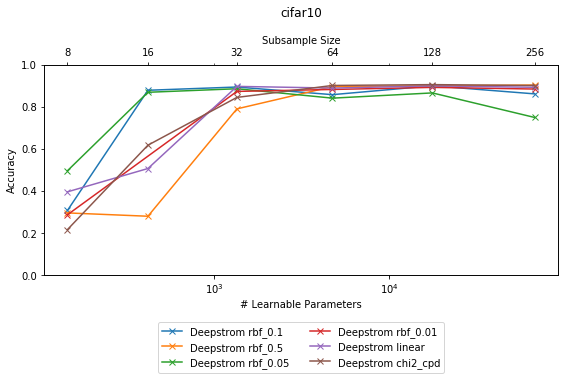

In [14]:
df_data = df
nb_classes_dataset = nb_classes_datasets[DATANAME]
nb_feature_conv = nb_feature_convs[DATANAME]
f, ax = plt.subplots()
for k_name in kernel_names:
    df_kernel = df_data[df_data["kernel"] == k_name]
    if k_name == "rbf":
        for g_val in gamma_values:
            k_name = "rbf" + "_" + str(g_val)
            df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
            accuracies_kernel = df_rbf["test_acc"]
            subsample_sizes_kernel = df_rbf["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            print(accuracies_kernel.values[sorted_idx])
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
    else:
        accuracies_kernel = df_kernel["test_acc"]
        subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
        np_param = (np.square(subsample_sizes_kernel) +  # m x m
                    subsample_sizes_kernel * nb_classes_dataset)  # m x c
        sorted_idx = np.argsort(np_param.values)
        xx = np_param.values[sorted_idx]
        print(accuracies_kernel.values[sorted_idx])
        yy = accuracies_kernel.values[sorted_idx].astype(float)
        ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
    

post_processing_figures(f, ax, np_param, subsample_sizes_kernel)